In [2]:
import torch
from pxr import Usd, Sdf

In [6]:
usd_path = "/home/arhan/Downloads/USDAssets/obj2sink_1.usda"
usd_stage = Usd.Stage.Open(usd_path)
test = usd_stage.GetDefaultPrim()
test.Get

[Usd.Prim(</World/Xform_262>),
 Usd.Prim(</World/Xform_265>),
 Usd.Prim(</World/SiteXform_266>),
 Usd.Prim(</World/SiteXform_267>),
 Usd.Prim(</World/Materials>)]

In [47]:
for entry in children:
    print(entry)
    print(entry.GetName())
    print(type(entry.GetPath()))

Usd.Prim(</World/Xform_262>)
Xform_262
<class 'pxr.Sdf.Path'>
Usd.Prim(</World/Xform_265>)
Xform_265
<class 'pxr.Sdf.Path'>
Usd.Prim(</World/SiteXform_266>)
SiteXform_266
<class 'pxr.Sdf.Path'>
Usd.Prim(</World/SiteXform_267>)
SiteXform_267
<class 'pxr.Sdf.Path'>
Usd.Prim(</World/Materials>)
Materials
<class 'pxr.Sdf.Path'>


In [60]:
usd_path = "/home/arhan/Downloads/USDAssets/obj2sink_1.usda"
usd_stage = Usd.Stage.Open(usd_path)
children = usd_stage.GetDefaultPrim().GetChildren()
p = usd_stage.GetDefaultPrim().GetChildren()[1].GetChildren()[-1]
ab = p.GetPath()
abc = Sdf.Path(ab.pathString)

In [61]:
p.GetReferences().AddReference(usd_path, abc)

@/home/arhan/Downloads/USDAssets/obj2sink_1.usda@,@anon:0x55e5f219b180:obj2sink_1-session.usda@</World/Xform_265/obj>
references:
@/home/arhan/Downloads/USDAssets/obj2sink_1.usda@</World/Xform_265/obj>
which CANNOT reference:
@/home/arhan/Downloads/USDAssets/obj2sink_1.usda@</World/Xform_265/obj>
 (recomposing stage on stage @/home/arhan/Downloads/USDAssets/obj2sink_1.usda@ <0x55e5f21da0c0>)
@/home/arhan/Downloads/USDAssets/obj2sink_1.usda@,@anon:0x55e5ec4daa00:obj2sink_1-session.usda@</World/Xform_265/obj>
references:
@/home/arhan/Downloads/USDAssets/obj2sink_1.usda@</World/Xform_265/obj>
which CANNOT reference:
@/home/arhan/Downloads/USDAssets/obj2sink_1.usda@</World/Xform_265/obj>
 (recomposing stage on stage @/home/arhan/Downloads/USDAssets/obj2sink_1.usda@ <0x55e5f2178610>)


True

In [71]:
temp = p.GetAttribute("xformOp:transform").Get()
a = torch.tensor(temp)

In [73]:
a.T

tensor([[ 1.0000,  0.0000,  0.0000,  0.6210],
        [ 0.0000,  1.0000,  0.0000,  0.2639],
        [ 0.0000,  0.0000,  1.0000, -0.5589],
        [ 0.0000,  0.0000,  0.0000,  1.0000]])

In [10]:
temp.Get()

Gf.Vec3f(-float('inf'), -float('inf'), -float('inf'))

In [2]:
d = torch.load("/home/arhan/.local/share/ov/pkg/isaac-sim-4.0.0/test.pt").cpu()

In [3]:
d[0].cpu().numpy().shape

(480, 640, 4)

In [7]:
import numpy as np
from PIL import Image


seg = d[0].cpu().numpy()[:,:] == np.array([0,0,0,255])

torch.Size([480, 640, 4]) torch.Size([1, 1, 4])
tensor(211590)
tensor(0, dtype=torch.int32) tensor(255, dtype=torch.int32)


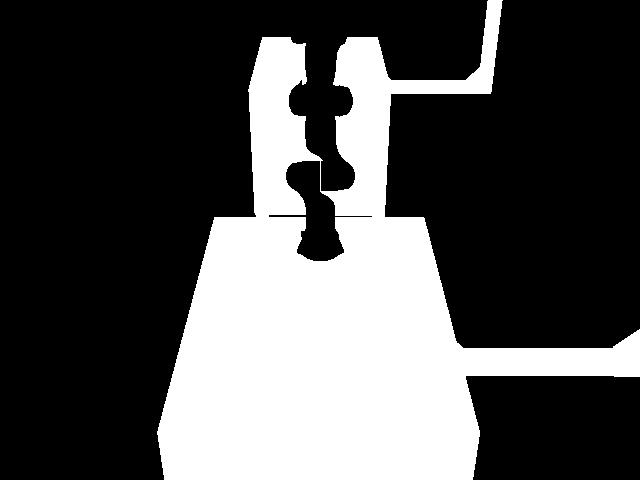

In [22]:
empty = torch.tensor([0,0,0,255])[None][None]
print(d[0].shape, empty.shape)

seg = (d[0] == empty).all(dim=2).int() * 255
print(seg.count_nonzero())
print(torch.min(seg), torch.max(seg))
seg = 255 - seg
Image.fromarray(seg.numpy().astype(np.uint8), mode="L")

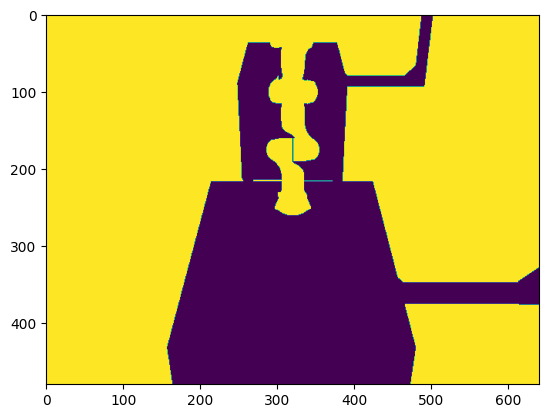

In [6]:
import matplotlib.pyplot as plt
plt.imshow(seg.numpy())

In [64]:
k480*640 - 211590

95610

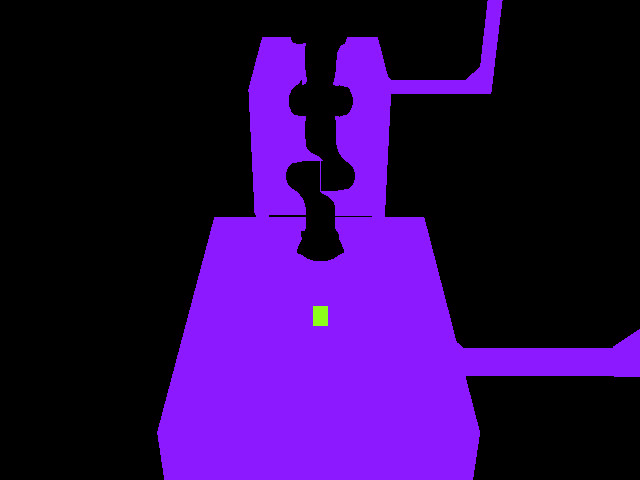

In [42]:
from PIL import Image
import numpy as np

Image.fromarray(d[0].cpu().numpy()).convert("CMYK")

In [23]:
seg = torch.load("/home/arhan/.local/share/ov/pkg/isaac-sim-4.0.0/segtest.pt").cpu()


FileNotFoundError: [Errno 2] No such file or directory: '/home/arhan/.local/share/ov/pkg/isaac-sim-4.0.0/segtest.pt'

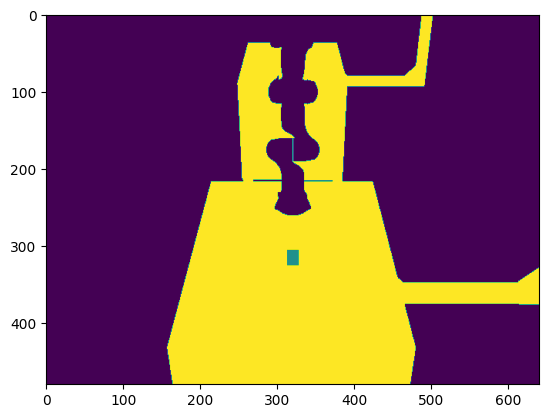

In [12]:
plt.imshow(seg[0].cpu().numpy())
